In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_ind = 50
num_gen = 1000
seq_len = 5
mut_rate = 0.0005
rounds = 300
K = 50
g = 20

In [ ]:
def mutation(allele):
    if np.random.rand() < mut_rate:
        return(abs(allele - 1))
    else:
        return allele

In [ ]:
def reproduce(gen):
    new_gen = []
    for i in range(gen.shape[0]):
        for j in range(np.random.poisson((1+g)/(1+g*(gen.shape[0]/K)))):
            alleles=[]
            for k in range(seq_len):
                alleles.append(mutation(gen[i][k]))
            new_gen.append(alleles)
    return np.array(new_gen)

In [ ]:
def get_h(gen):
    freq_a = (np.sum(gen, axis = 0))/gen.shape[0]
    freq_A = 1 - freq_a
    h = 1 - freq_a**2 - freq_A**2
    return h

In [ ]:
hlist_all=[]
for j in range(rounds):
    hlist=[]
    gen1 = np.full((num_ind, seq_len), 0)
    hlist.append(get_h(gen1).tolist())
    ori_gen = gen1
    for i in range(num_gen-1):
        new_gen = reproduce(ori_gen)
        hlist.append(get_h(new_gen).tolist())
        ori_gen = new_gen
    hlist_all.append(hlist)

In [ ]:
hlist_all_array = np.array(hlist_all)

In [ ]:
h_avg = np.average(hlist_all_array, axis = 0)

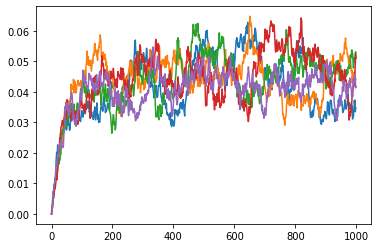

In [ ]:
plt.plot(h_avg)
plt.show()

In [ ]:
np.average(h_avg[-1])

0.04480170226300742

In [ ]:
1-(1-0.0005)**100

0.04878246975766576